<a href="https://colab.research.google.com/github/jw9603/machine_learning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')bb

Mounted at /content/gdrive/


### 과일  사진 다운로드

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-04-14 06:26:14--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-04-14 06:26:14--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-04-14 06:26:15--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [5]:
import numpy as np

fruits = np.load('fruits_300.npy')
print(fruits.shape) # (300,100,100)
fruits_2d = fruits.reshape(-1,100*100)
print(fruits_2d.shape)

(300, 100, 100)
(300, 10000)


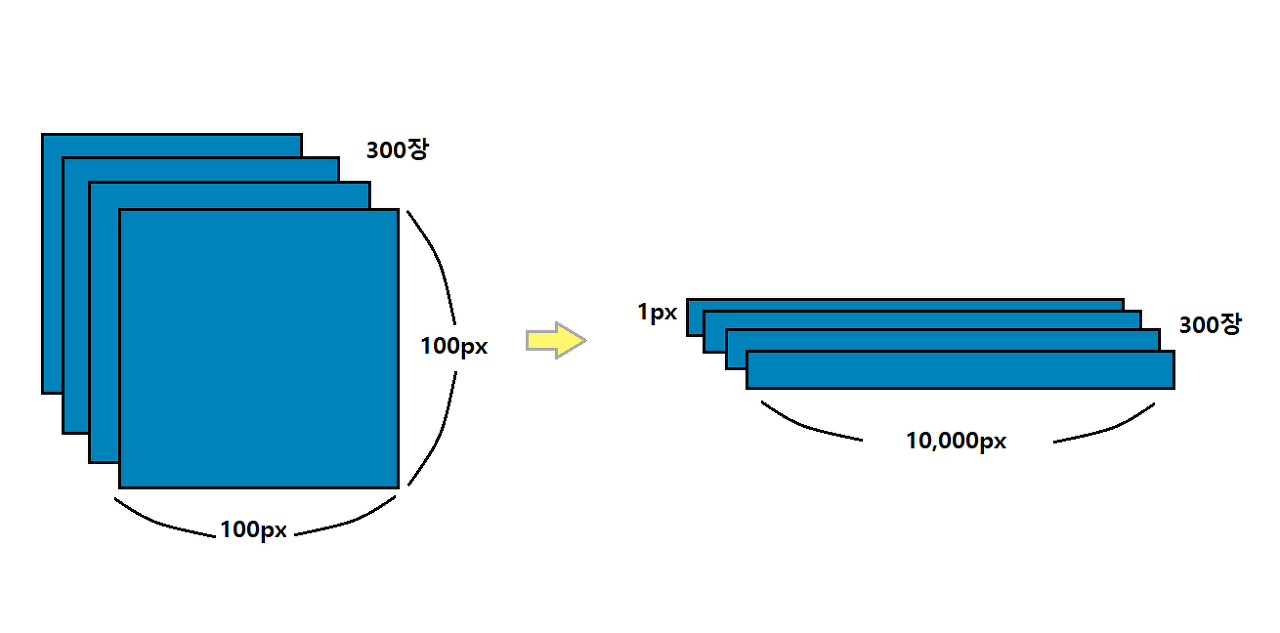

### 사이킷런에서 kmeans 소환

In [8]:
from sklearn.cluster import KMeans

km = KMeans(init='random',n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km)

KMeans(init='random', n_clusters=3, random_state=42)


In [9]:
print(km.labels_)

[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [12]:
print(np.unique(km.labels_,return_counts=True))
#그렇다면 0이 뭐고 1이뭐고 2가 뭘까

(array([0, 1, 2], dtype=int32), array([ 98,  90, 112]))


### 1, 2, 3 label이 무엇일까?

In [22]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    print(n,rows)
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

98 10


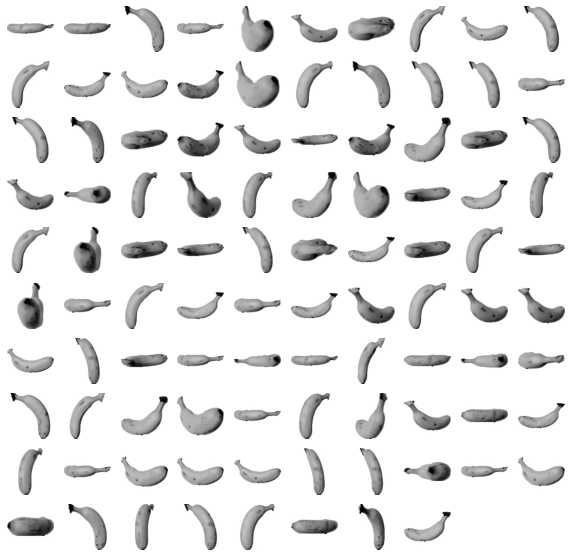

In [23]:
draw_fruits(fruits[km.labels_==0])

90 9


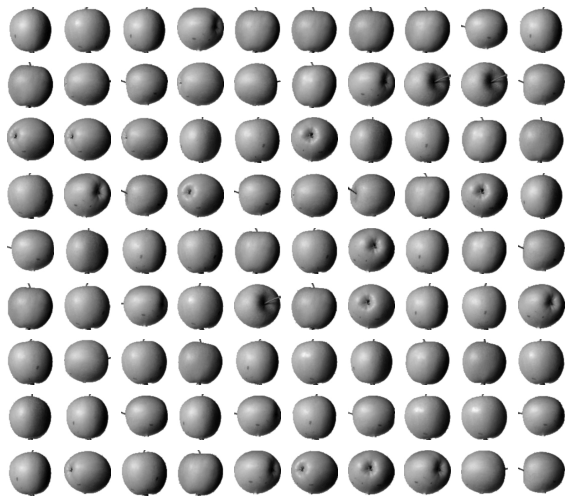

In [24]:
draw_fruits(fruits[km.labels_==1])

112 12


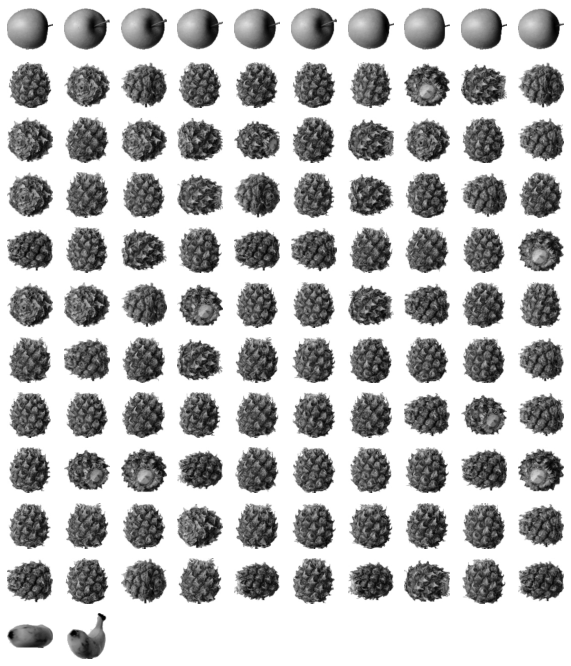

In [25]:
draw_fruits(fruits[km.labels_==2])

In [32]:
print(km.cluster_centers_.shape)

(3, 10000)


3 1


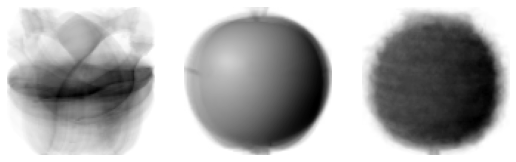

In [34]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

이너셔(inertia)
- 각 샘플과 가장 가까운 센트로이드 사이의 거리의 제곱들의 합

[5856532545.983113, 5074977316.088373, 4673588404.856072, 4344167864.512113, 3997030130.9539833]


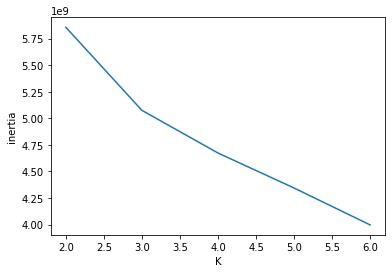

In [36]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
print(inertia)

plt.plot(range(2,7),inertia)
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()